In [26]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
pd.set_option('display.max_columns', None)
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
import time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv('../DATA.csv', encoding='cp932')
df=df.dropna(axis=0)

y=df['EColi.']
X=df.loc[:, ['up_down', 'curvature', 'inclination', 'tilt_direction', 
#              'altitude', 'source_ecoli',
             'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'supply_hours', 'no_water_days', 'total_population ', 'population_served',
             'popu-served', 'number_taps', 'pipelength', 'pipelength_per_pipe', 'served/pipes', '(popu-served)/pipes', 
             'oldest_pipe_age', 'ST', 'RSF', 'FL', 'PF', 'RF', 'ratio',  'nearest_source_E']]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,
                                                  random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Lables counts in y_test:', np.bincount(y_test))

X_train_std=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_std=(X_test-X_train.mean(axis=0))/X_train.std(axis=0)

def threshold(fare):
    if fare<=0:
        return 0
    else:
        return 1
    
X_train_std['ST']=X_train_std['ST'].apply(threshold)
X_train_std['RSF']=X_train_std['RSF'].apply(threshold)
X_train_std['FL']=X_train_std['FL'].apply(threshold)
X_train_std['PF']=X_train_std['PF'].apply(threshold)
X_train_std['RF']=X_train_std['RF'].apply(threshold)
X_test_std['ST']=X_test_std['ST'].apply(threshold)
X_test_std['RSF']=X_test_std['RSF'].apply(threshold)
X_test_std['FL']=X_test_std['FL'].apply(threshold)
X_test_std['PF']=X_test_std['PF'].apply(threshold)
X_test_std['RF']=X_test_std['RF'].apply(threshold)

# 分割する
X_cross=(X-X.mean(axis=0))/X.std(axis=0)
X_cross['ST']=X_cross['ST'].apply(threshold)
X_cross['RSF']=X_cross['RSF'].apply(threshold)
X_cross['FL']=X_cross['FL'].apply(threshold)
X_cross['PF']=X_cross['PF'].apply(threshold)
X_cross['RF']=X_cross['RF'].apply(threshold)

Labels counts in y: [ 95 115]
Lables counts in y_train: [67 80]
Lables counts in y_test: [28 35]


# LDA

In [36]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_std, y_train)
val=cross_val_score(estimator=clf, X=X_cross, y=y, cv=20)
val1=np.mean(val)
print(clf.score(X_train_std, y_train))
print(clf.score(X_test_std, y_test))
print(val1)

0.673469387755102
0.746031746031746
0.470909090909091


# LR

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

max_score =0
SearchMethod = 0
param_range=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
                                      
dic={}
for i in range(len(param_range)):
    lr=LogisticRegression(C=param_range[i], random_state=1)
    lr.fit(X_train_std, y_train)
    score1 = lr.score(X_test_std, y_test)
    score2 = lr.score(X_train_std, y_train)
    dic[lr]=score1

    if score1>max_score:
        val=cross_val_score(estimator=lr, X=X_cross, y=y, cv=20)
        val1=np.mean(val)
        print('params: %s, train: %3f, test: %3f, val: %3f' %(lr, score2, score1, val1))

params: LogisticRegression(C=0.0001, random_state=1), train: 0.544218, test: 0.555556, val: 0.547727
params: LogisticRegression(C=0.001, random_state=1), train: 0.544218, test: 0.555556, val: 0.543182
params: LogisticRegression(C=0.01, random_state=1), train: 0.557823, test: 0.571429, val: 0.569091
params: LogisticRegression(C=0.1, random_state=1), train: 0.646259, test: 0.619048, val: 0.511364
params: LogisticRegression(random_state=1), train: 0.598639, test: 0.587302, val: 0.496364


C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

params: LogisticRegression(C=10.0, random_state=1), train: 0.659864, test: 0.619048, val: 0.482273


C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

params: LogisticRegression(C=100.0, random_state=1), train: 0.680272, test: 0.650794, val: 0.477727


C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

params: LogisticRegression(C=1000.0, random_state=1), train: 0.666667, test: 0.666667, val: 0.487273


C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [37]:
lr=LogisticRegression(C=0.01, random_state=1)
lr.fit(X_train_std, y_train)
score1 = lr.score(X_test_std, y_test)
score2 = lr.score(X_train_std, y_train)
print(score1)
print(score2)

0.5714285714285714
0.5578231292517006


# svm

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

max_score =0
SearchMethod = 0
param_range=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
                                      
dic={}
for i in tqdm(range(len(param_range))):
    svm=SVC(kernel='linear', C=param_range[i], random_state=1)
    svm.fit(X_train_std, y_train)
    score1 = svm.score(X_test_std, y_test)
    score2 = svm.score(X_train_std, y_train)
    dic[svm]=score1

    if score1>max_score:
        val=cross_val_score(estimator=svm, X=X_cross, y=y, cv=20)
        val1=np.mean(val)
        print('params: %s, train: %3f, test: %3f, val: %3f' %(svm, score2, score1, val1))

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [38]:
svm=SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
score1 = lr.score(X_test_std, y_test)
score2 = lr.score(X_train_std, y_train)
print(score1)
print(score2)

0.5714285714285714
0.5578231292517006


# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

max_score =0.71
min_score=0.8
SearchMethod = 0
RFC_grid ={"n_estimators": [i for i in range(1, 51)],
           "criterion": ["gini", "entropy"],
           "max_depth":[i for i in range(1, 21)]
          }
           
                                      
dic={}
for i in tqdm(range(len(RFC_grid['n_estimators']))):
           for l in range(len(RFC_grid["criterion"])):
               for k in range(len(RFC_grid["max_depth"])):
                    forest=RandomForestClassifier(max_depth=RFC_grid["max_depth"][k], criterion=RFC_grid["criterion"][l], n_estimators=RFC_grid['n_estimators'][i], random_state=1)
                    forest.fit(X_train_std, y_train)
                    score1 = forest.score(X_test_std, y_test)
                    score2 = forest.score(X_train_std, y_train)
                    dic[forest]=score1

                    if score1>max_score:
                        if score2<min_score:
                             val=cross_val_score(estimator=forest, X=X_cross, y=y, cv=20)
                             val1=np.mean(val)
                             print('params: %s, train: %3f, test: %3f, val: %3f' %(forest, score2, score1, val1))

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=15, criterion='gini',n_estimators=13, random_state=1)
forest.fit(X_train_std, y_train)
print(forest.score(X_train_std, y_train))
print(forest.score(X_test_std, y_test))

0.9863945578231292
0.6190476190476191


 1) no_water_days                  0.115566
 2) popu-served                    0.091204
 3) disto_river                    0.088918
 4) inclination                    0.087825
 5) disto_syorizyo                 0.073450
 6) oldest_pipe_age                0.057143
 7) served/pipes                   0.053577
 8) supply_hours                   0.050573
 9) tilt_direction                 0.050400
10) pipelength_per_pipe            0.049986
11) disto_mainroad                 0.039678
12) (popu-served)/pipes            0.039042
13) curvature                      0.038317
14) ratio                          0.035618
15) pipelength                     0.028821
16) population_served              0.027062
17) disto_stations                 0.022804
18) nearest_source_E               0.018762
19) number_taps                    0.017689
20) total_population               0.009914
21) up_down                        0.003651
22) ST                             0.000000
23) RSF                         

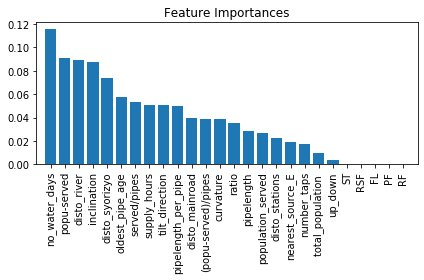

In [40]:
from sklearn.ensemble import RandomForestClassifier
feat_labels=X.columns[0:]
forest=RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=29, random_state=1)
forest.fit(X_train_std, y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

# ARF

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

max_score =0.65
min_score=0.90
SearchMethod = 0
RFC_grid ={"base_estimator" : [DecisionTreeClassifier(max_depth=x) 
                                  for x in range(1, 21)],
              "learning_rate" : [0.5, 1.0, 1.5],
              "n_estimators": [i for i in range(1, 51)],
           }   
                                      
dic={}
for i in tqdm(range(len(RFC_grid['base_estimator']))):
           for l in range(len(RFC_grid["learning_rate"])):
               for k in range(len(RFC_grid["n_estimators"])):
                    ada = AdaBoostClassifier(base_estimator=RFC_grid["base_estimator"][i], learning_rate=RFC_grid["learning_rate"][l], n_estimators=RFC_grid['n_estimators'][k], random_state=1)
                    ada.fit(X_train_std, y_train)
                    score1 = ada.score(X_test_std, y_test)
                    score2 = ada.score(X_train_std, y_train)
                    dic[ada]=score1

                    if score1>max_score and 0.71:
                        if score2<min_score :
                             val=cross_val_score(estimator=ada, X=X_cross, y=y, cv=20)
                             val1=np.mean(val)
                             print('params: %s, train: %3f, test: %3f, val: %3f' %(ada, score2, score1, val1))

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=18, random_state=1), train: 0.828947, test: 0.651515, val: 0.585909
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=21, random_state=1), train: 0.855263, test: 0.651515, val: 0.567273
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=22, random_state=1), train: 0.855263, test: 0.651515, val: 0.571818
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=23, random_state=1), train: 0.835526, test: 0.651515, val: 0.567273
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=24, random_state=1), train: 0.875000, test: 0.651515, val: 0.558182
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learnin

  5%|████▏                                                                              | 1/20 [00:27<08:43, 27.53s/it]

params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=5, random_state=1), train: 0.815789, test: 0.651515, val: 0.551818
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=2, random_state=1), train: 0.697368, test: 0.666667, val: 0.552727
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=5, random_state=1), train: 0.822368, test: 0.651515, val: 0.539545
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=9, random_state=1), train: 0.888158, test: 0.651515, val: 0.525455


 10%|████████▎                                                                          | 2/20 [00:47<07:35, 25.30s/it]

params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=2, random_state=1), train: 0.763158, test: 0.681818, val: 0.538636
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=3, random_state=1), train: 0.815789, test: 0.742424, val: 0.534091
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=4, random_state=1), train: 0.875000, test: 0.651515, val: 0.560909
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=2, random_state=1), train: 0.789474, test: 0.651515, val: 0.584091
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=3, random_state=1), train: 0.848684, test: 0.712121, val: 0.588182
params: AdaBoostClassifier(base_estimator=DecisionTre

 15%|████████████▍                                                                      | 3/20 [01:09<06:52, 24.25s/it]

params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, n_estimators=2, random_state=1), train: 0.842105, test: 0.712121, val: 0.492273
params: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=2, random_state=1), train: 0.861842, test: 0.681818, val: 0.501364


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:16<00:00,  9.81s/it]


In [52]:
X_train_std

,up_down,curvature,inclination,tilt_direction,altitude,disto_river,disto_stations,disto_mainroad,disto_syorizyo,supply_hours,no_water_days,total_population,population_served,popu-served,number_taps,pipelength,pipelength_per_pipe,served/pipes,(popu-served)/pipes,oldest_pipe_age,ST,RSF,FL,PF,RF,ratio,source_ecoli
216,-0.708742,-0.332556,0.048877,-0.499537,-1.132270,-0.261522,-1.270975,-0.134608,-0.049270,1.009180,-1.482984,-1.035729,-1.010099,-1.137692,-1.026670,-1.040723,0.019980,-1.276738,-0.512732,-0.790003,1,1,0,0,0,1.084656,-1.272475
97,0.208285,0.648968,0.083724,0.681555,0.929396,-0.273641,0.942787,-0.399175,-0.262072,-0.765937,0.502152,1.008618,1.009288,0.994830,1.007989,1.005357,-0.174308,0.966378,-0.358239,1.003773,1,1,1,1,1,-0.722374,0.926867
148,-0.708742,-1.191389,0.084235,0.178151,0.901154,-0.545637,1.021978,-0.183867,-0.069734,-0.765937,0.502152,1.008618,1.009288,0.994830,1.007989,1.005357,-0.174308,0.966378,-0.358239,1.003773,1,1,1,1,1,-0.722374,0.926867
189,1.867667,0.035516,0.079805,1.322350,-1.160512,-0.509308,-0.972280,-0.357510,-0.403307,0.415263,-0.875454,-1.027813,-1.015769,-1.069916,-1.037307,-1.075525,0.029677,-1.184980,0.936412,-1.097508,0,0,0,0,0,1.084656,-1.299058
191,-0.708742,-0.577936,0.079543,0.131159,-1.165496,-0.447357,-0.957797,-0.110967,-0.434582,0.415263,-0.875454,-1.027813,-1.015769,-1.069916,-1.037307,-1.075525,0.029677,-1.184980,0.936412,-1.097508,0,0,0,0,0,1.084656,-1.299058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,-0.708742,-0.700627,0.072804,-0.018793,-0.949528,-0.386210,-0.255789,0.927290,0.060301,1.721881,-1.410819,-0.860701,-0.926974,-0.559035,-0.865303,-0.527228,0.006654,-1.345752,-0.337213,-0.969381,0,0,0,0,0,1.084656,-1.162941
153,-0.708742,-0.577936,0.084042,-0.468957,0.934380,1.364782,1.120841,-0.307075,0.077573,-0.765937,0.502152,1.008618,1.009288,0.994830,1.007989,1.005357,-0.174308,0.966378,-0.358239,1.003773,1,1,1,1,1,-0.722374,0.926867
16,-0.708742,0.280896,0.080655,-1.374168,-1.105690,-0.284091,-1.334650,-0.219071,-0.403644,0.058912,-0.326663,-1.029285,-1.016018,-1.076769,-1.035238,-1.071279,0.005583,-1.290515,0.612804,-0.969381,0,0,0,0,0,1.084656,-0.978781
141,-0.708742,-1.068698,0.083286,0.042214,0.917767,-0.479169,1.052911,0.145185,-0.073004,-0.765937,0.502152,1.008618,1.009288,0.994830,1.007989,1.005357,-0.174308,0.966378,-0.358239,1.003773,1,1,1,1,1,-0.722374,0.926867
